In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# SC1015 Mini-Project

## Part 1: Analysing data off of an Anime Dataset and aiming to identify the factors that make a quality show through EDA and Data Viz.

## Part 2: Building 2 Machine Learning Models and analysing which is the better.

## Part 3: Using the appropriate model to take an input from the user and suggest an anime according to their preferences.

---------

**Data Cleaning and Analysis of Factors**

In [3]:
Anime = pd.read_csv("Anime.csv", na_values = ['Unknown'])

In [4]:
Anime.head()

,MAL_ID,Name,Score,Genres,Genre,English name,Japanese name,Type,Episodes,Aired,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Top Show
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Action,Cowboy Bebop,カウボーイビバップ,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,Yes
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Action,Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1.0,"Sep 1, 2001",...,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,Yes
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Action,Trigun,トライガン,TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,Yes
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Action,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26.0,"Jul 2, 2002 to Dec 24, 2002",...,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,No
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Adventure,Beet the Vandel Buster,冒険王ビィト,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,No


In [5]:
print(Anime.dtypes)

MAL_ID             int64
Name              object
Score            float64
Genres            object
Genre             object
English name      object
Japanese name     object
Type              object
Episodes         float64
Aired             object
Premiered         object
Producers         object
Licensors         object
Studios           object
Source            object
Duration          object
Rating            object
Ranked           float64
Popularity         int64
Members            int64
Favorites          int64
Watching           int64
Completed          int64
On-Hold            int64
Dropped            int64
Plan to Watch      int64
Score-10         float64
Score-9          float64
Score-8          float64
Score-7          float64
Score-6          float64
Score-5          float64
Score-4          float64
Score-3          float64
Score-2          float64
Score-1          float64
Top Show          object
dtype: object


In [6]:
##There are 35 coloumns, most of which contain repetitive data.
##I will be using only the Original Names for easier comprehension.
##The first principle genre has been selected for our study

In [7]:
AnimeData = Anime.drop(["English name", "Japanese name"], axis=1)

In [8]:
#Our principal objective is to build a model that predicts which shows have the highest rating, so we can weed
##out factors that do not serve our purpose like Show ID, Premiere Data etc

In [9]:
AnimeData = AnimeData.drop(["MAL_ID", "Aired","Premiered"], axis=1)

In [10]:
TopShow = pd.DataFrame(AnimeData['Top Show'])
Score = pd.DataFrame(AnimeData['Score'])

In [11]:
##To look at the category we hope to describe as well as the precise Score we hope to pinpoint.

In [12]:
TopShow.describe()

,Top Show
count,17562
unique,2
top,No
freq,10848


In [13]:
Score.describe()

,Score
count,12421.000000
mean,6.509999
std,0.886717
min,1.850000
25%,5.930000
50%,6.520000
75%,7.140000
max,9.190000


In [14]:
##We can see that a lot of shows have unknown scores, so to this we will have to remove all Unknown values.
##Not just from the score coloumn but from our entire dataset

In [15]:
AnimeData = pd.read_csv("Anime.csv", na_values = ['Unknown'])

In [16]:
AnimeData = AnimeData.dropna()
TopShow = pd.DataFrame(AnimeData['Top Show'])
Score = pd.DataFrame(AnimeData['Score'])

In [17]:
Score.describe()

,Score
count,1584.000000
mean,7.243258
std,0.697840
min,4.710000
25%,6.787500
50%,7.260000
75%,7.690000
max,9.190000


In [18]:
TopShow.describe()

,Top Show
count,1584
unique,2
top,No
freq,1018


In [19]:
##After removing all the Unknown values, we now have roughly 1600 Anime to work with. 

--------
**EDA and Data Viz**

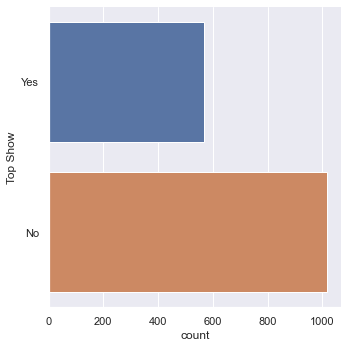

In [20]:
sb.catplot(y="Top Show",data = TopShow, kind = "count")

In [21]:
##For our understanding, we have classified a Top Show to be one that achieves a score higher than 7.5


**Now to identify what are the coloumns can serve as suitable predictors**

In [22]:
predictors = pd.DataFrame(AnimeData[["Name","Genre","Type","Episodes","Source","Rating","Popularity","Members","Dropped","Completed","Score","Top Show"]])

In [23]:
predictors.head()

,Name,Genre,Type,Episodes,Source,Rating,Popularity,Members,Dropped,Completed,Score,Top Show
0,Cowboy Bebop,Action,TV,26.0,Original,R - 17+ (violence & profanity),39,1251960,26678,718161,8.78,Yes
2,Trigun,Action,TV,26.0,Manga,PG-13 - Teens 13 or older,201,558913,13925,343492,8.24,Yes
3,Witch Hunter Robin,Action,TV,26.0,Original,PG-13 - Teens 13 or older,1467,94683,5378,46165,7.27,No
6,Hachimitsu to Clover,Comedy,TV,24.0,Manga,PG-13 - Teens 13 or older,687,214499,11026,81145,8.06,Yes
9,Monster,Drama,TV,74.0,Manga,R+ - Mild Nudity,169,614100,23008,214491,8.76,Yes


## Variables - Meaning

**Genre - What genre does the anime satisfy**

**Type - Streaming Type**

**Episodes - Number of Episodes**

**Source - Source of Story**

**Rating - Age restricted rating**

**Popularity - No: of people in a survey who knew of it**

**Members - People in the show's active community**

**Dropped - Number of People who started the show but left midway**

**Completed - No: of people who completed the show**

**Score - Average score earned by the show (out of 10)**

**Top Show - Classification of if the show is a high quality show**

In [24]:
##Now to identify the correlation between our predictors as well as the ultimate value.


In [25]:
print(predictors.dtypes)

Name           object
Genre          object
Type           object
Episodes      float64
Source         object
Rating         object
Popularity      int64
Members         int64
Dropped         int64
Completed       int64
Score         float64
Top Show       object
dtype: object


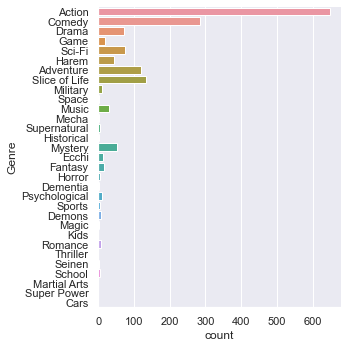

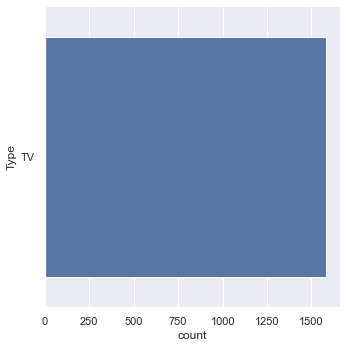

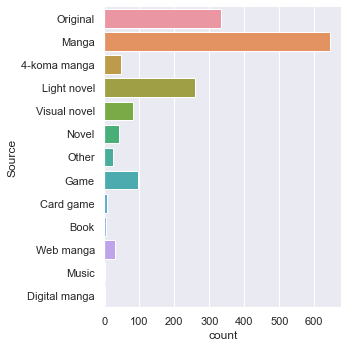

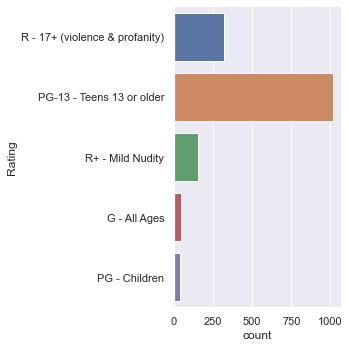

In [26]:
sb.catplot(y="Genre", data=predictors, kind="count")
sb.catplot(y="Type", data=predictors, kind="count")
sb.catplot(y="Source", data=predictors, kind="count")
sb.catplot(y="Rating", data=predictors, kind="count")

In [27]:
## To have a futher look at the distribution of the Anime across these categories

Text(0.5, 1.0, 'Genre vs Score')

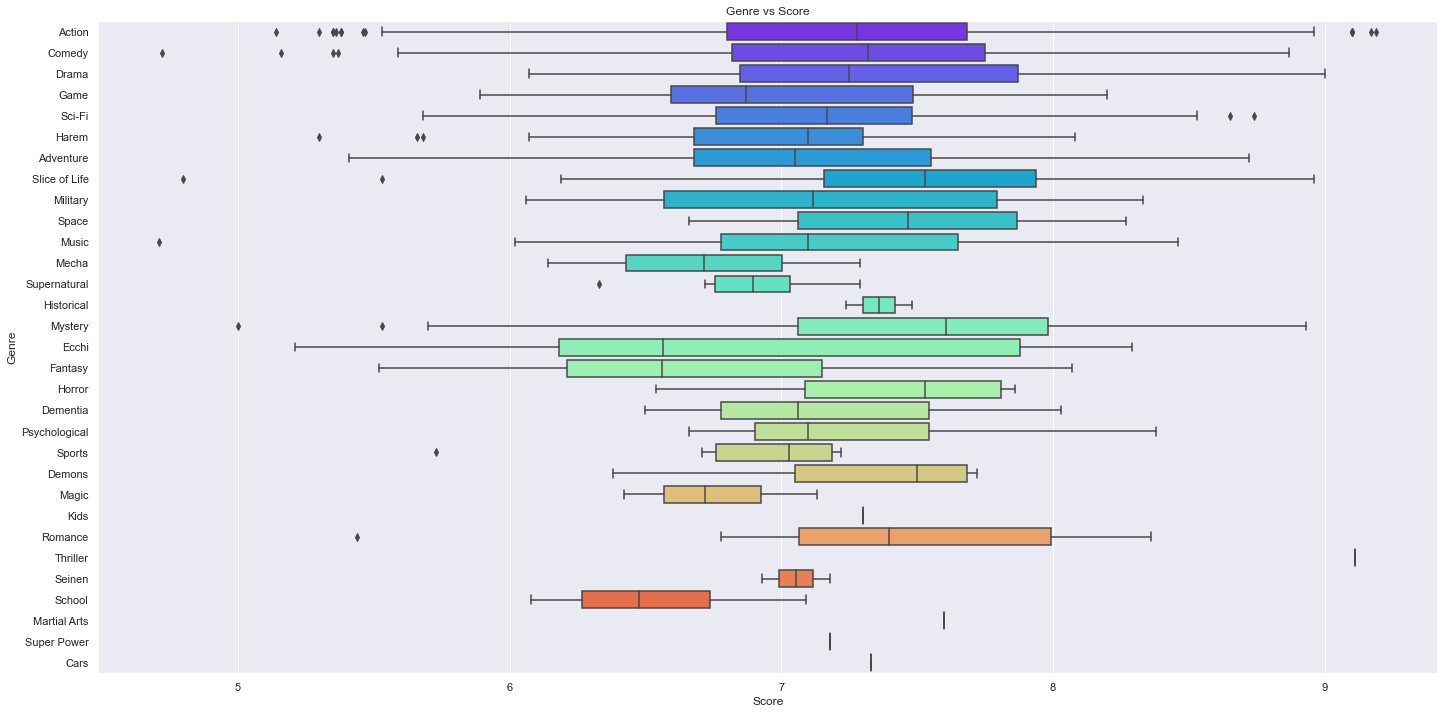

In [28]:
plt.figure(figsize=(24,12))
sb.boxplot(x="Score", y="Genre", data=predictors, palette="rainbow")
plt.title("Genre vs Score")

Text(0.5, 1.0, 'Source vs Score')

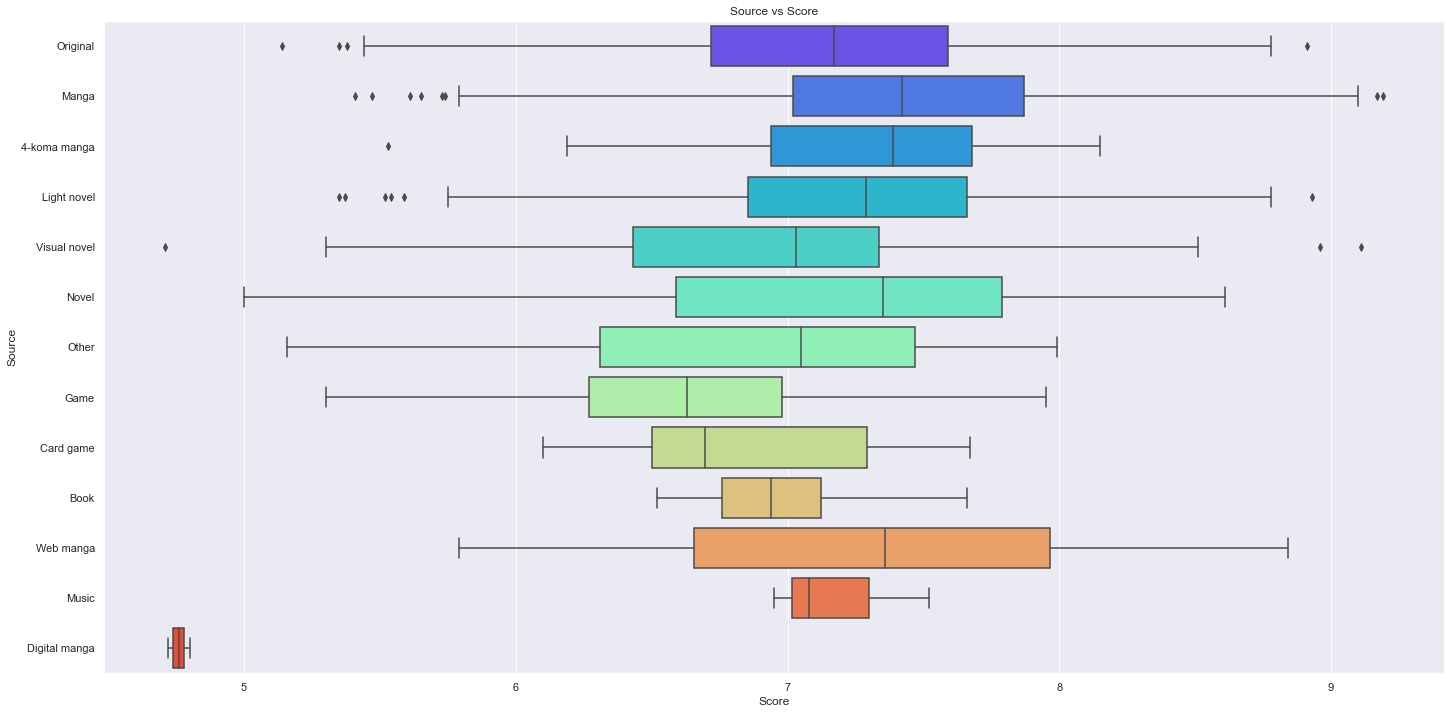

In [29]:
plt.figure(figsize=(24,12))
sb.boxplot(x="Score", y="Source", data=predictors, palette="rainbow")
plt.title("Source vs Score")

Text(0.5, 1.0, 'Rating vs Score')

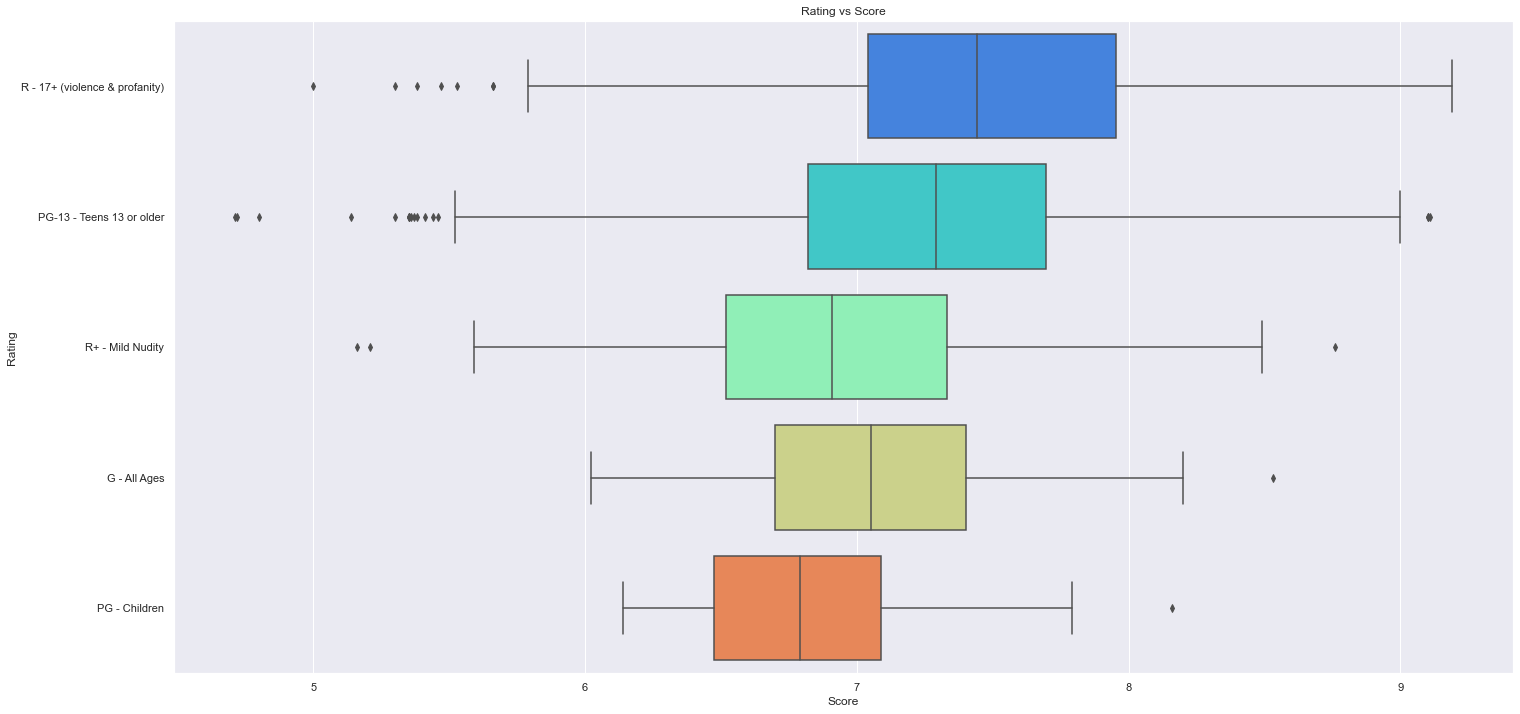

In [30]:
plt.figure(figsize=(24,12))
sb.boxplot(x="Score", y="Rating", data=predictors, palette="rainbow")
plt.title("Rating vs Score")

**We see that type will not be a suitable predictor as all the Anime are streamed on TV**


In [31]:
#Now we see a stripplot, to look at the distribution of the predictors

<AxesSubplot:xlabel='Score', ylabel='Genre'>

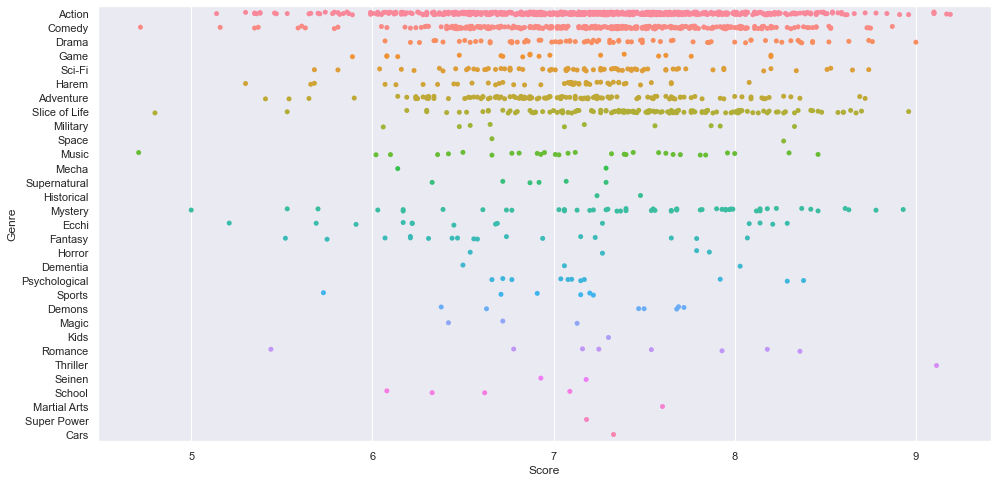

In [32]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Score', y = 'Genre', data = predictors)

<AxesSubplot:xlabel='Score', ylabel='Rating'>

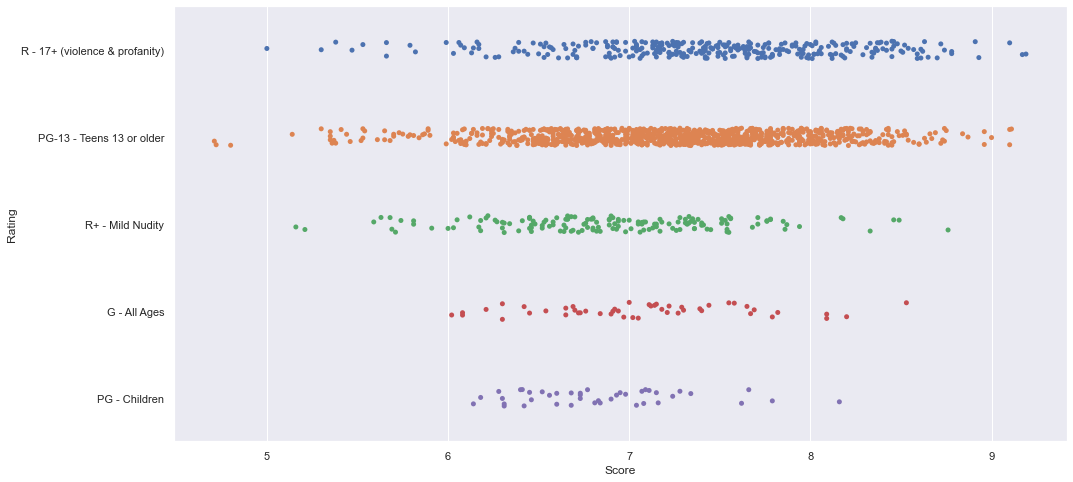

In [33]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Score', y = 'Rating', data = predictors)

<AxesSubplot:xlabel='Score', ylabel='Source'>

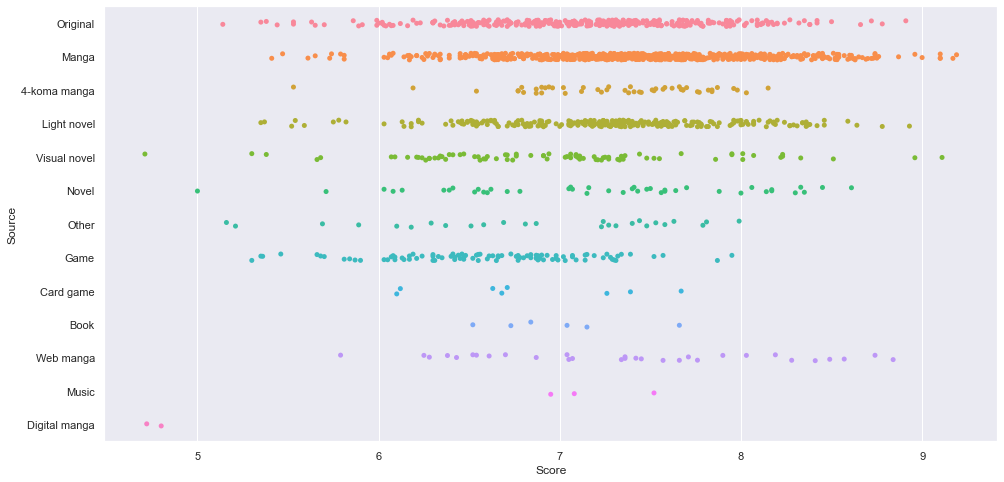

In [34]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Score', y = 'Source', data = predictors)

In [35]:
##Now to analyse our numerical Predictors

In [36]:
Episodes = pd.DataFrame(predictors['Episodes'])
Popularity = pd.DataFrame(predictors['Popularity'])
Members = pd.DataFrame(predictors['Members'])
Dropped = pd.DataFrame(predictors['Dropped'])
Completed = pd.DataFrame(predictors['Completed'])

Episodes    7.176663
dtype: float64
Popularity    1.697145
dtype: float64
Members    2.852317
dtype: float64
Dropped    5.231252
dtype: float64
Completed    3.406439
dtype: float64


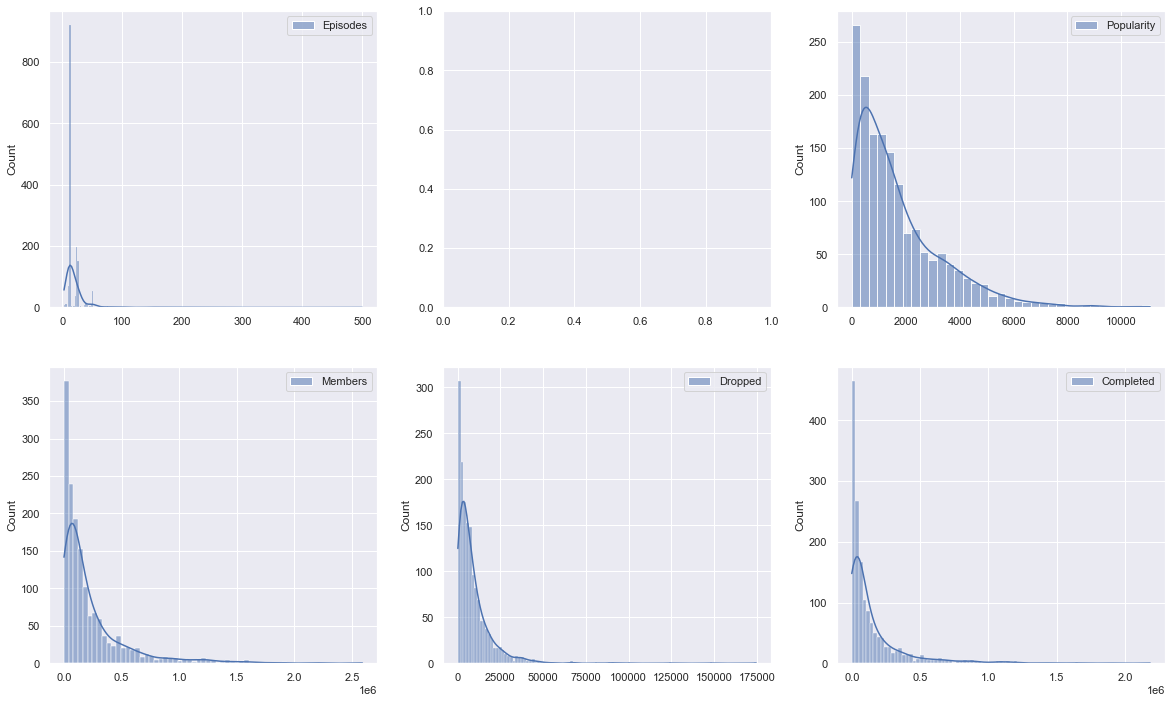

In [37]:
f,axes = plt.subplots(2,3,figsize=(20,12))
sb.histplot(data=Episodes, ax=axes[0,0],kde=True)
sb.histplot(data=Popularity, ax=axes[0,2],kde=True)
sb.histplot(data=Members, ax=axes[1,0],kde=True)
sb.histplot(data=Dropped, ax=axes[1,1],kde=True)
sb.histplot(data=Completed, ax=axes[1,2],kde=True)

print(Episodes.skew())
print(Popularity.skew())
print(Members.skew())
print(Dropped.skew())
print(Completed.skew())

In [38]:
corr = pd.DataFrame(predictors[["Episodes","Completed","Dropped","Members","Popularity","Score"]])

In [39]:
corr.corr()

,Episodes,Completed,Dropped,Members,Popularity,Score
Episodes,1.000000,0.080075,0.359615,0.117189,0.028456,0.144425
Completed,0.080075,1.000000,0.639427,0.980986,-0.497195,0.452206
Dropped,0.359615,0.639427,1.000000,0.713972,-0.479163,0.187938
Members,0.117189,0.980986,0.713972,1.000000,-0.552123,0.499161
Popularity,0.028456,-0.497195,-0.479163,-0.552123,1.000000,-0.502444
Score,0.144425,0.452206,0.187938,0.499161,-0.502444,1.000000


In [40]:
##Analysing the score row, we see that most variables have a decent correlation with the Score
##which will help us in accurately predicting it

---

**Now to create Machine Learning Models that can use our Numerical and Categorical Data to correctly predict the Score**

In [41]:
predictors['Genre'] = predictors['Genre'].replace(['Action'],1)
predictors['Genre'] = predictors['Genre'].replace(['Comedy'],2)
predictors['Genre'] = predictors['Genre'].replace(['Drama'],3)
predictors['Genre'] = predictors['Genre'].replace(['Game'],4)
predictors['Genre'] = predictors['Genre'].replace(['Sci-Fi'],5)
predictors['Genre'] = predictors['Genre'].replace(['Harem'],6)
predictors['Genre'] = predictors['Genre'].replace(['Adventure'],7)
predictors['Genre'] = predictors['Genre'].replace(['Slice of Life'],8)
predictors['Genre'] = predictors['Genre'].replace(['Military'],9)
predictors['Genre'] = predictors['Genre'].replace(['Space'],10)
predictors['Genre'] = predictors['Genre'].replace(['Music'],11)
predictors['Genre'] = predictors['Genre'].replace(['Mecha'],12)
predictors['Genre'] = predictors['Genre'].replace(['Supernatural'],13)
predictors['Genre'] = predictors['Genre'].replace(['Historical'],14)
predictors['Genre'] = predictors['Genre'].replace(['Mystery'],15)
predictors['Genre'] = predictors['Genre'].replace(['Ecchi'],16)
predictors['Genre'] = predictors['Genre'].replace(['Fantasy'],17)
predictors['Genre'] = predictors['Genre'].replace(['Horror'],18)
predictors['Genre'] = predictors['Genre'].replace(['Dementia'],19)
predictors['Genre'] = predictors['Genre'].replace(['Psychological'],20)
predictors['Genre'] = predictors['Genre'].replace(['Sports'],21)
predictors['Genre'] = predictors['Genre'].replace(['Demons'],22)
predictors['Genre'] = predictors['Genre'].replace(['Magic'],23)
predictors['Genre'] = predictors['Genre'].replace(['Kids'],24)
predictors['Genre'] = predictors['Genre'].replace(['Romance'],25)
predictors['Genre'] = predictors['Genre'].replace(['Thriller'],26)
predictors['Genre'] = predictors['Genre'].replace(['Seinen'],27)
predictors['Genre'] = predictors['Genre'].replace(['School'],28)
predictors['Genre'] = predictors['Genre'].replace(['Martial Arts'],29)
predictors['Genre'] = predictors['Genre'].replace(['Super Power'],30)
predictors['Genre'] = predictors['Genre'].replace(['Cars'],31)


In [42]:
predictors['Source'] = predictors['Source'].replace(['Original'],1)
predictors['Source'] = predictors['Source'].replace(['Manga'],2)
predictors['Source'] = predictors['Source'].replace(['4-koma manga'],3)
predictors['Source'] = predictors['Source'].replace(['Light novel'],4)
predictors['Source'] = predictors['Source'].replace(['Visual novel'],5)
predictors['Source'] = predictors['Source'].replace(['Novel'],6)
predictors['Source'] = predictors['Source'].replace(['Other'],7)
predictors['Source'] = predictors['Source'].replace(['Game'],8)
predictors['Source'] = predictors['Source'].replace(['Card game'],9)
predictors['Source'] = predictors['Source'].replace(['Book'],10)
predictors['Source'] = predictors['Source'].replace(['Web manga'],11)
predictors['Source'] = predictors['Source'].replace(['Music'],12)
predictors['Source'] = predictors['Source'].replace(['Digital manga'],13)

In [43]:
predictors['Rating'] = predictors['Rating'].replace(['R - 17+ (violence & profanity)'],1)
predictors['Rating'] = predictors['Rating'].replace(['PG-13 - Teens 13 or older'],2)
predictors['Rating'] = predictors['Rating'].replace(['R+ - Mild Nudity'],3)
predictors['Rating'] = predictors['Rating'].replace(['G - All Ages'],4)
predictors['Rating'] = predictors['Rating'].replace(['PG - Children'],5)

In [44]:
Genre = pd.get_dummies(predictors['Genre'], prefix=None, prefix_sep='_', 
                   dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

**Importing and Applying a train and test split on our data**

In [69]:
from sklearn.model_selection import train_test_split

X=predictors[['Name','Episodes','Completed','Dropped','Members','Popularity','Genre','Rating','Source']]  # Predictors
Y=predictors['Top Show']  # Response

In [70]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [71]:
from sklearn.ensemble import RandomForestClassifier  ##Fitting a Random Forest Classifier Model
Model = RandomForestClassifier(n_estimators = 100)

In [72]:
Model.fit(X_train[['Episodes','Completed','Dropped','Members','Popularity','Genre','Rating','Source']],y_train)

RandomForestClassifier()

In [73]:
RFC_pred = Model.predict(X_test[['Episodes','Completed','Dropped','Members','Popularity','Genre','Rating','Source']])
RFC_predtrain = Model.predict(X_train[['Episodes','Completed','Dropped','Members','Popularity','Genre','Rating','Source']])

In [74]:
from sklearn import metrics

print("Train Model Accuracy:",metrics.accuracy_score(y_train, Model.predict(X_train[['Episodes','Completed','Dropped','Members','Popularity','Genre','Rating','Source']])))

print("Prediction Accuracy:",metrics.accuracy_score(y_test, RFC_pred))

Train Model Accuracy: 1.0
Prediction Accuracy: 0.8454258675078864


In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dectree1 = DecisionTreeClassifier(max_depth=100) # Fitting a Decision Tree Model

In [77]:
dectree1.fit(X_train[['Episodes','Completed','Dropped','Members','Popularity','Genre','Rating','Source']],y_train)

DecisionTreeClassifier(max_depth=100)

In [78]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


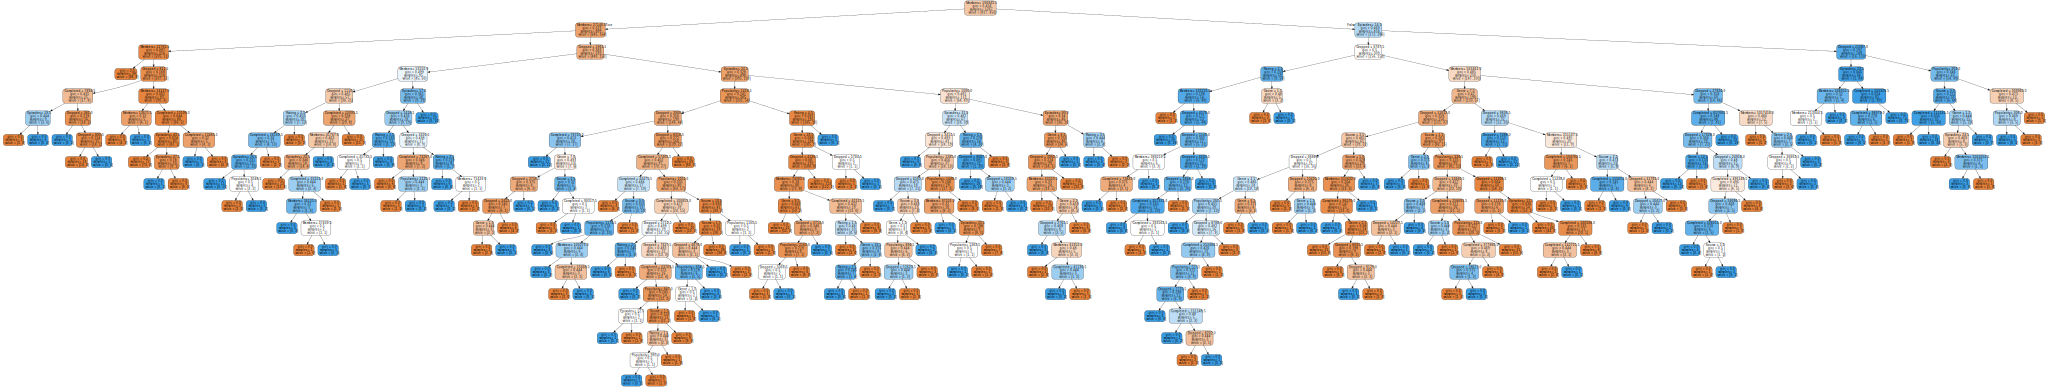

In [79]:
from sklearn.tree import export_graphviz

treedot1 = export_graphviz(dectree1,feature_names = X_train[['Episodes','Completed','Dropped','Members','Popularity','Genre','Rating','Source']].columns,out_file=None,filled=True,rounded=True,special_characters=True)
import graphviz
graphviz.Source(treedot1)

In [80]:
DT_pred = dectree1.predict(X_test[['Episodes','Completed','Dropped','Members','Popularity','Genre','Rating','Source']])

In [81]:
DT_predtrain = dectree1.predict(X_train[['Episodes','Completed','Dropped','Members','Popularity','Genre','Rating','Source']])

In [82]:
print("Classification Accuracy on Train data: ", dectree1.score(X_train[['Episodes','Completed','Dropped','Members','Popularity','Genre','Rating','Source']],y_train))
print("Classification Accuracy on Test data: ", dectree1.score(X_test[['Episodes','Completed','Dropped','Members','Popularity','Genre','Rating','Source']],y_test))

Classification Accuracy on Train data:  1.0
Classification Accuracy on Test data:  0.7665615141955836


**Comparing the accuracy of both our model upon the train and  test data using a Confusion Matrix**

Confusion Matrix for Random Forest Classification on Train Data: 


<AxesSubplot:>

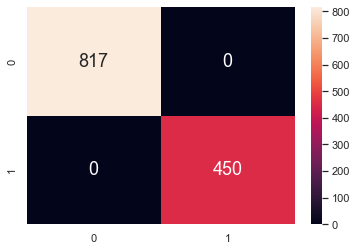

In [83]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix for Random Forest Classification on Train Data: ")
sb.heatmap(confusion_matrix(y_train,RFC_predtrain),annot=True,fmt=".0f",annot_kws={"size":18})

Confusion Matrix for Random Forest Classification on Test Data: 


<AxesSubplot:>

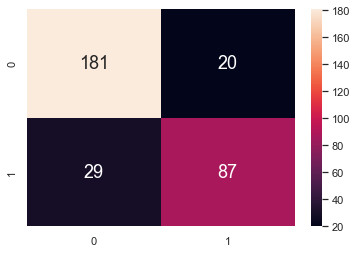

In [84]:
print("Confusion Matrix for Random Forest Classification on Test Data: ")
sb.heatmap(confusion_matrix(y_test,RFC_pred),annot=True,fmt=".0f",annot_kws={"size":18})

**For the RFC, we see that it has a TNR = 0.90 , TPR = 0.75 , FNR = 0.25, FPR= 0.09**

Confusion Matrix for Decision Tree on Train Data: 


<AxesSubplot:>

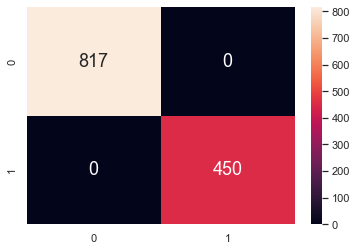

In [108]:
print("Confusion Matrix for Decision Tree on Train Data: ")
sb.heatmap(confusion_matrix(y_train,DT_predtrain),annot=True,fmt=".0f",annot_kws={"size":18})

Confusion Matrix for Decision Tree on Test Data: 


<AxesSubplot:>

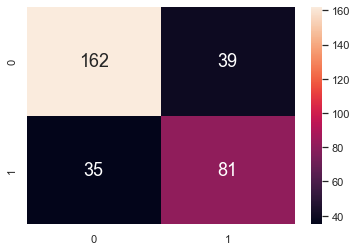

In [109]:
print("Confusion Matrix for Decision Tree on Test Data: ")
sb.heatmap(confusion_matrix(y_test,DT_pred),annot=True,fmt=".0f",annot_kws={"size":18})

**For the RFC, we see that it has a TNR = 0.80 , TPR = 0.69 , FNR = 0.30 , FPR = 0.19**

**While both the models are fairly accurate, our Random Forest Classifier slightly edges it, having** 
**far less False Positives and False Negatives**

**Our Random Forest Classifier has a classification accuracy of approximately 0.845 which is a strong model**

In [110]:
TestData = X_test
TestData["Top Show"] = y_test
TestData

/var/folders/7d/wmtnyr5x07vdc2tyd25csdr40000gn/T/ipykernel_2206/3858589355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestData["Top Show"] = y_test


,Name,Episodes,Completed,Dropped,Members,Popularity,Genre,Rating,Source,Top Show,Recommended Movie (By RFC Model)
13758,Date A Live III,12.0,135419,6129,223731,658,5,1,4,No,No
13349,Dame x Prince Anime Caravan,12.0,8041,2091,22025,3485,7,2,5,No,No
10569,Steins;Gate 0,23.0,294077,12481,590847,185,5,2,5,Yes,Yes
11597,Dungeon ni Deai wo Motomeru no wa Machigatteir...,12.0,199917,14783,315578,443,1,2,4,No,No
7648,Kingdom 2nd Season,39.0,47556,1323,79350,1675,1,1,2,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
385,Gun x Sword,26.0,35795,3586,65323,1894,1,2,1,No,No
8887,Psycho-Pass 2,11.0,352491,11888,508172,234,1,1,1,No,Yes
12247,Kyoukai no Rinne (TV) 3rd Season,25.0,7924,692,18691,3756,2,2,2,No,No
13519,Uchuu Senkan Tiramisù,13.0,9437,3013,23788,3356,2,2,11,No,No


In [111]:
TestData["Recommended Movie (By RFC Model)"] = RFC_pred

/var/folders/7d/wmtnyr5x07vdc2tyd25csdr40000gn/T/ipykernel_2206/1274052230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestData["Recommended Movie (By RFC Model)"] = RFC_pred


In [112]:
TestData

,Name,Episodes,Completed,Dropped,Members,Popularity,Genre,Rating,Source,Top Show,Recommended Movie (By RFC Model)
13758,Date A Live III,12.0,135419,6129,223731,658,5,1,4,No,No
13349,Dame x Prince Anime Caravan,12.0,8041,2091,22025,3485,7,2,5,No,No
10569,Steins;Gate 0,23.0,294077,12481,590847,185,5,2,5,Yes,Yes
11597,Dungeon ni Deai wo Motomeru no wa Machigatteir...,12.0,199917,14783,315578,443,1,2,4,No,No
7648,Kingdom 2nd Season,39.0,47556,1323,79350,1675,1,1,2,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
385,Gun x Sword,26.0,35795,3586,65323,1894,1,2,1,No,No
8887,Psycho-Pass 2,11.0,352491,11888,508172,234,1,1,1,No,Yes
12247,Kyoukai no Rinne (TV) 3rd Season,25.0,7924,692,18691,3756,2,2,2,No,No
13519,Uchuu Senkan Tiramisù,13.0,9437,3013,23788,3356,2,2,11,No,No


In [113]:
PredictedYes = TestData[TestData["Recommended Movie (By RFC Model)"]=="Yes"]
PredictedYes

,Name,Episodes,Completed,Dropped,Members,Popularity,Genre,Rating,Source,Top Show,Recommended Movie (By RFC Model)
10569,Steins;Gate 0,23.0,294077,12481,590847,185,5,2,5,Yes,Yes
7648,Kingdom 2nd Season,39.0,47556,1323,79350,1675,1,1,2,Yes,Yes
10876,Re:Zero kara Hajimeru Isekai Seikatsu,25.0,1130438,34941,1478842,21,20,1,4,Yes,Yes
1984,Clannad,23.0,725568,36403,1095634,58,2,2,5,Yes,Yes
14963,Shingeki no Kyojin Season 3 Part 2,10.0,906824,3099,1073626,63,1,1,2,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
4728,Durarara!!,24.0,651208,44157,1111256,57,1,1,4,Yes,Yes
9370,Junjou Romantica 3,12.0,70239,1662,92499,1500,2,2,2,Yes,Yes
15663,Mushoku Tensei: Isekai Ittara Honki Dasu,11.0,39,2584,319654,438,3,1,4,Yes,Yes
13644,Boku no Hero Academia 3rd Season,25.0,1080843,11218,1333355,31,1,2,2,Yes,Yes


**The above data frame shows a list of anime from the Test Data that our RFC Model has predicted to be a Top Show.**

**Now, this is a vast range and we want to see if we can use another model to predict a show based on a user's individual preference and not simply by the overal popularity of the show**

-----

## Now, we will take a user input and apply our Machine Learning model to obtain an Anime Recommendation for our user

# Content-Based Filtering

In [114]:
AnimeData.head()

,MAL_ID,Name,Score,Genres,Genre,English name,Japanese name,Type,Episodes,Aired,...,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Top Show,Combined
0,1,Cowboy Bebop,8.78,"action,adventure,comedy,drama,sci-fi,space",Action,Cowboy Bebop,カウボーイビバップ,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,Yes,"action,adventure,comedy,drama,sci-fi,space ban..."
2,6,Trigun,8.24,"action,sci-fi,adventure,comedy,drama,shounen",Action,Trigun,トライガン,TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,Yes,"action,sci-fi,adventure,comedy,drama,shounen v..."
3,7,Witch Hunter Robin,7.27,"action,mystery,police,supernatural,drama,magic",Action,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26.0,"Jul 2, 2002 to Dec 24, 2002",...,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,No,"action,mystery,police,supernatural,drama,magic..."
6,16,Hachimitsu to Clover,8.06,"comedy,drama,josei,romance,sliceoflife",Comedy,Honey and Clover,ハチミツとクローバー,TV,24.0,"Apr 15, 2005 to Sep 27, 2005",...,20008.0,13062.0,5574.0,3148.0,1339.0,484.0,278.0,321.0,Yes,"comedy,drama,josei,romance,sliceoflife genco,f..."
9,19,Monster,8.76,"drama,horror,mystery,police,psychological,sein...",Drama,Monster,モンスター,TV,74.0,"Apr 7, 2004 to Sep 28, 2005",...,43459.0,22045.0,8861.0,4381.0,2086.0,882.0,593.0,1177.0,Yes,"drama,horror,mystery,police,psychological,sein..."


In [115]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

We will using 3 variables (Genre, Producers and Studios) to determine the similarity between the animes

In [116]:
features = ['Genres', 'Producers', 'Studios']

In [117]:
print(AnimeData.dtypes)

MAL_ID             int64
Name              object
Score            float64
Genres            object
Genre             object
English name      object
Japanese name     object
Type              object
Episodes         float64
Aired             object
Premiered         object
Producers         object
Licensors         object
Studios           object
Source            object
Duration          object
Rating            object
Ranked           float64
Popularity         int64
Members            int64
Favorites          int64
Watching           int64
Completed          int64
On-Hold            int64
Dropped            int64
Plan to Watch      int64
Score-10         float64
Score-9          float64
Score-8          float64
Score-7          float64
Score-6          float64
Score-5          float64
Score-4          float64
Score-3          float64
Score-2          float64
Score-1          float64
Top Show          object
Combined          object
dtype: object


Clean data by removing the spaces and changing to lowercase

In [118]:
def data_cleaning(x):
    return str.lower(x.replace(" ",""))

In [119]:
for feature in features:
    AnimeData[feature] = AnimeData[feature].apply(data_cleaning)
    
AnimeData

,MAL_ID,Name,Score,Genres,Genre,English name,Japanese name,Type,Episodes,Aired,...,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Top Show,Combined
0,1,Cowboy Bebop,8.78,"action,adventure,comedy,drama,sci-fi,space",Action,Cowboy Bebop,カウボーイビバップ,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,Yes,"action,adventure,comedy,drama,sci-fi,space ban..."
2,6,Trigun,8.24,"action,sci-fi,adventure,comedy,drama,shounen",Action,Trigun,トライガン,TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,Yes,"action,sci-fi,adventure,comedy,drama,shounen v..."
3,7,Witch Hunter Robin,7.27,"action,mystery,police,supernatural,drama,magic",Action,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26.0,"Jul 2, 2002 to Dec 24, 2002",...,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,No,"action,mystery,police,supernatural,drama,magic..."
6,16,Hachimitsu to Clover,8.06,"comedy,drama,josei,romance,sliceoflife",Comedy,Honey and Clover,ハチミツとクローバー,TV,24.0,"Apr 15, 2005 to Sep 27, 2005",...,20008.0,13062.0,5574.0,3148.0,1339.0,484.0,278.0,321.0,Yes,"comedy,drama,josei,romance,sliceoflife genco,f..."
9,19,Monster,8.76,"drama,horror,mystery,police,psychological,sein...",Drama,Monster,モンスター,TV,74.0,"Apr 7, 2004 to Sep 28, 2005",...,43459.0,22045.0,8861.0,4381.0,2086.0,882.0,593.0,1177.0,Yes,"drama,horror,mystery,police,psychological,sein..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16748,41694,Hataraku Saibou Black (TV),7.57,"action,seinen",Action,Cells at Work! CODE BLACK!,はたらく細胞BLACK,TV,13.0,"Jan 10, 2021 to ?",...,4929.0,4700.0,1441.0,503.0,143.0,65.0,25.0,30.0,Yes,"action,seinen aniplex,kodansha,studiomausu,tok..."
16798,41911,Hanyou no Yashahime: Sengoku Otogizoushi,6.86,"action,adventure,comedy,historical,demons,supe...",Action,Yashahime:Princess Half-Demon,半妖の夜叉姫,TV,24.0,"Oct 3, 2020 to ?",...,2219.0,3473.0,2219.0,1340.0,556.0,202.0,100.0,350.0,No,"action,adventure,comedy,historical,demons,supe..."
16809,41930,Kamisama ni Natta Hi,6.86,"drama,fantasy",Drama,The Day I Became a God,神様になった日,TV,12.0,"Oct 11, 2020 to Dec 27, 2020",...,12528.0,17585.0,11032.0,5688.0,3257.0,1477.0,762.0,661.0,No,"drama,fantasy aniplex,movic,visualart's,tokyom..."
17165,42897,Horimiya,8.60,"sliceoflife,comedy,romance,school,shounen",Slice of Life,Horimiya,ホリミヤ,TV,13.0,"Jan 10, 2021 to ?",...,24494.0,9619.0,2458.0,1023.0,310.0,135.0,75.0,337.0,Yes,"sliceoflife,comedy,romance,school,shounen anip..."


In [120]:
def combine(row):
    return row['Genres']+' '+row['Producers']+' '+row['Studios']

#add combined features
AnimeData['Combined'] = AnimeData.apply(combine, axis=1)

AnimeData['Combined']

0        action,adventure,comedy,drama,sci-fi,space ban...
2        action,sci-fi,adventure,comedy,drama,shounen v...
3        action,mystery,police,supernatural,drama,magic...
6        comedy,drama,josei,romance,sliceoflife genco,f...
9        drama,horror,mystery,police,psychological,sein...
                               ...                        
16748    action,seinen aniplex,kodansha,studiomausu,tok...
16798    action,adventure,comedy,historical,demons,supe...
16809    drama,fantasy aniplex,movic,visualart's,tokyom...
17165    sliceoflife,comedy,romance,school,shounen anip...
17173       comedy,sports aniplex,movic,abcanimation bones
Name: Combined, Length: 1584, dtype: object

In [121]:
#Create new CountVectorizer() object 
count = CountVectorizer()
count_matrix = count.fit_transform(AnimeData['Combined'])

count_matrix.shape

(1584, 754)

In [122]:
#Calculate cosine similarity matrix using count_matrix

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [123]:
#drop duplicates 

indices = pd.Series(AnimeData.index, index=AnimeData['Name']).drop_duplicates()
indices[:10]

Name
Cowboy Bebop             0
Trigun                   2
Witch Hunter Robin       3
Hachimitsu to Clover     6
Monster                  9
Naruto                  10
Tennis no Ouji-sama     12
School Rumble           14
Sunabouzu               15
Texhnolyze              16
dtype: int64

In [124]:
#anime recommendation function 

def recommendations(title):
    #get index of anime 
    idx = indices[title]
    #get list of similar animes 
    similar_animes = list(enumerate(cosine_sim[idx]))
    #sort animes in list based on similarity scores & discard the first anime (which is itself)
    sort_animes = sorted(similar_animes,key=lambda x:x[1],reverse=True)[1:]
    #get scores of top 5 similar animes
    sort_animes_5 = sort_animes[0:5]
    #get anime indices
    anime_indices = [i[0] for i in sort_animes_5]
    print("Recommended animes for "+title+" are:\n")
    return AnimeData['Name'].iloc[anime_indices]

In [125]:
#Display top 5 recommendations for the 'Bleach' anime 
recommendations('Bleach')

Recommended animes for Bleach are:



83                      Ayashi no Ceres
78                            Mai-Otome
101              Full Moon wo Sagashite
306                      Midori no Hibi
488    Mermaid Melody Pichi Pichi Pitch
Name: Name, dtype: object

# Item-Based Collaborative Filtering 

In [126]:
#user dataset 

user = pd.read_csv("User.csv")

user

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
...,...,...,...
1048570,6745,36286,9
1048571,6745,32094,6
1048572,6745,30015,10
1048573,6745,35466,10


Explanatory Data Analysis (EDA) for User data 

user_id      5890
anime_id    12164
rating         10
dtype: int64


<AxesSubplot:>

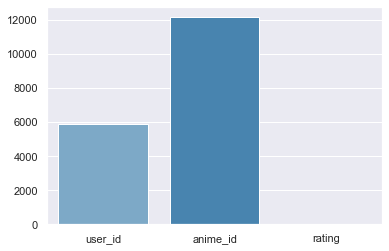

In [127]:
#get unique counts of each column
print(user.nunique(axis=0))
#represent no. of unique counts for each column in a bar plot 
sb.barplot(x = user.columns, y = user.nunique(axis=0), palette="Blues_d")

<Figure size 1152x288 with 0 Axes>

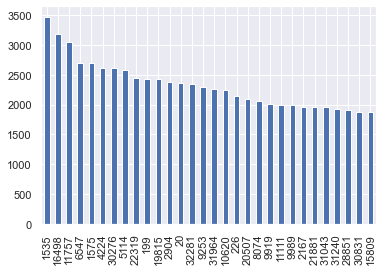

<Figure size 1152x288 with 0 Axes>

In [128]:
#number of times each anime_id was being rated 

user['anime_id'].value_counts()[:30].plot(kind = 'bar') #take top 10 movies
plt.figure(2, figsize = (16,4))

From this graph, it can be seen that the most rated anime is the anime with index 1535 and it was rated nearly 3500 times. However, the number of ratings are not evenly distributed amongst the animes 

<Figure size 576x288 with 0 Axes>

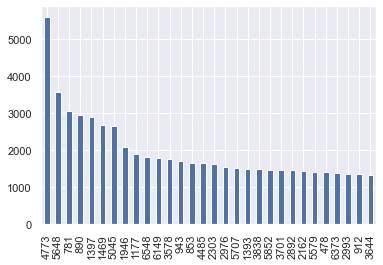

<Figure size 576x288 with 0 Axes>

In [129]:
#no. of times each user rated the anime

user['user_id'].value_counts()[:30].plot(kind = 'bar')
plt.figure(3, figsize = (8,4))

Similar to the number of ratings for the animes, the number of ratings by each user is not evenly distributed, with the highest rating about 5500 times.

<AxesSubplot:ylabel='Frequency'>

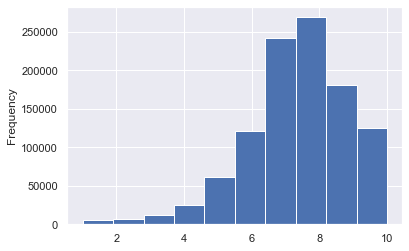

In [130]:
#plot histogram to show the frequency of each rating 
user['rating'].plot(kind = 'hist')

From the histogram, we can see the distribution of ratings and majority of people give a rating of around 8

Machine Learning

In [133]:
pip install scikit-surprise

  Using cached scikit-surprise-1.1.1.tar.gz (11.8 MB)
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp39-cp39-macosx_10_9_x86_64.whl size=749664 sha256=dd1308730729a54fddf42551b32d17b721c1800e98db835976d5743449a6906b
  Stored in directory: /Users/silentguardian/Library/Caches/pip/wheels/6b/10/c9/7f607c8cb522ef378844f41e63b30d7181a6495d2c1ae514e9
Successfully built scikit-surprise
Note: you may need to restart the kernel to use updated packages.


In [134]:
#KNN (K Nearest Neighbours)

from surprise import KNNWithMeans 

similarity = {"name": "cosine", "user-based": False} 
algo_KNN = KNNWithMeans(sim_options = similarity)

#SVD 

from surprise import SVD
algo_SVD = SVD()

1. Cross-Validation 

In [135]:
from surprise import Dataset
from surprise import Reader

#load user data into Surprise Reader
reader = Reader(rating_scale = (0,10))
rating_df = Dataset.load_from_df(user[['user_id','anime_id','rating']], reader)

In [136]:
#Pass algo_KNN and algo_SVD into cross validate func with 5 cross validate folds

from surprise.model_selection import cross_validate 

crossvalidateKNN = cross_validate(algo_KNN, rating_df, measures=['RMSE','MAE'], cv=5, verbose=True)
crossvalidateSVD = cross_validate(algo_SVD, rating_df, measures=['RMSE','MAE'], cv=5, verbose=True)                             

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2644  1.2724  1.2678  1.2627  1.2687  1.2672  0.0034  
MAE (testset)     0.9606  0.9668  0.9656  0.9609  0.9646  0.9637  0.0025  
Fit time          50.24   48.39   49.67   52.22   53.00   50.70   1.68    
Test time         114.64  112.15  129.60  123.35  125.35  121.02  6.59    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2037  1.2041  1.2007  1.1963  1.2

From the table, it can been that the KNN algorithin has an RMSE mean of 1.2668 and MAE mean of 0.9635. On the other hand, the SVD algorithm has a lower RMSE mean of 1.2011 and lower MAE mean of 0.9008. Therefore, the SVD algorithm is more accurate and performs better than the KNN algorithm.

2. Train-test split evaluation 

In [137]:
from surprise.model_selection import train_test_split
from surprise import accuracy

#train test func 
def train_test(algo, label):
    X_train, X_test = train_test_split(rating_df, test_size = 0.2)
    test_output = algo.test(X_test)
    test_df = pd.DataFrame(test_output)
    print("RMSE -",label, accuracy.rmse(test_output, verbose = False))
    print("MAE -", label, accuracy.mae(test_output, verbose=False))
    print("MSE -", label, accuracy.mse(test_output, verbose=False))
    print(" ")
    return test_df

#Compare model accuracies

#KNN
print("Model Accuracy of KNN:\n")
train_test_KNN = train_test(algo_KNN, "algo_KNN")
print(train_test_KNN.head())

#SVD
print("Model Accuracy of SVD:\n")
train_test_SVD = train_test(algo_SVD, "algo_SVD")
print(train_test_SVD.head())

Model Accuracy of KNN:

RMSE - algo_KNN 1.1197830538011428
MAE - algo_KNN 0.8433927812933752
MSE - algo_KNN 1.253914087580213
 
    uid    iid  r_ui       est                                    details
0  3792    779   8.0  8.036084  {'actual_k': 40, 'was_impossible': False}
1  3743  21939   9.0  8.691402  {'actual_k': 40, 'was_impossible': False}
2  4773   5715   2.0  2.942225   {'actual_k': 7, 'was_impossible': False}
3  2469  31240   7.0  7.804486  {'actual_k': 40, 'was_impossible': False}
4  3578      1   8.0  8.467265  {'actual_k': 40, 'was_impossible': False}
Model Accuracy of SVD:

RMSE - algo_SVD 0.8533675792016271
MAE - algo_SVD 0.6357126002826882
MSE - algo_SVD 0.7282362252324452
 
    uid    iid  r_ui       est                    details
0  5043   1689   8.0  9.139369  {'was_impossible': False}
1  1301  16592  10.0  9.655443  {'was_impossible': False}
2  1199   1045   7.0  7.694279  {'was_impossible': False}
3  6108    790  10.0  9.905338  {'was_impossible': False}
4  6238  

The SVD algorithm has a lower Root Mean Squared Error (RMSE) mean of 0.85, lower Mean Absolute Error (MAE) mean of 0.64 and lower Mean Squared Error of 0.73 The SVD algorithm is more accurate and performs better than the KNN algorithm.

Provide top recommendations for each algorithm

In [138]:
#prediction algo to create dataframe for K number of users and iterate through all the movies in the dataset

def prediction(algo, K): #K is the no. of users 
    pred_list = []
    for userid in range(1, K):
        for animeid in range (1, 17562):
            #predict rating
            rating = algo.predict(userid, animeid).est
            #append rating to list
            pred_list.append([userid, animeid, rating])
    #create dataframe for predictions 
    pred_df = pd.DataFrame(pred_list, columns = ['UserId', 'AnimeId','rating'])
    return pred_df

In [139]:
Anime_df2 = pd.read_csv("Anime.csv", na_values = ['Unknown'])

In [140]:
#create function to recommend animes to users

def recommendations(pred_df, top_N): #top_N is the number of top animes to recommend
    #merge the dataframes - AnimeData and User 
    recommended_animes = pd.merge(pred_df, Anime_df2, how='left', left_on='AnimeId', right_on='MAL_ID')[['UserId','AnimeId','rating','MAL_ID','Name']]
    #sort the recommended animes by the rating
    sorted_animes = recommended_animes.groupby(('UserId'), as_index = False).apply(lambda x: x.sort_values(['rating'], ascending = False)).reset_index(drop=True)
    #only show the top_N recommended animes
    top_recommended_animes = sorted_animes.groupby('UserId').head(top_N)
    return sorted_animes, top_recommended_animes

In [141]:
# Prediction using KNN 
pred_KNN = prediction(algo_KNN, 5)
recommended_animes_KNN, top_recommended_animes_KNN = recommendations(pred_KNN, 3)
top_recommended_animes_KNN

,UserId,AnimeId,rating,MAL_ID,Name
0,1,5153,10.0,5153.0,Kikou Kai Galient
1,1,1491,10.0,1491.0,Ginga Tetsudou 999
2,1,5920,10.0,5920.0,Xanadu Dragonslayer Densetsu
17561,2,10466,10.0,10466.0,Phantom Yuusha Densetsu
17562,2,4062,10.0,4062.0,Musashi no Ken
17563,2,4371,10.0,4371.0,Uchuu Senshi Baldios (Movie)
35122,3,5232,10.0,5232.0,Ninja Bugei-chou
35123,3,6447,10.0,6447.0,Break-Age
35124,3,5763,10.0,5763.0,Uchuu Kuubo Blue Noah
52683,4,5476,10.0,5476.0,Fushigi na Melmo


In [142]:
# Prediction using SVD
pred_SVD = prediction(algo_SVD, 5)
recommended_animes_SVD, top_recommended_animes_SVD = recommendations(pred_SVD, 3)
top_recommended_animes_SVD

,UserId,AnimeId,rating,MAL_ID,Name
0,1,820,10.000000,820.0,Ginga Eiyuu Densetsu
1,1,5114,9.725169,5114.0,Fullmetal Alchemist: Brotherhood
2,1,199,9.677073,199.0,Sen to Chihiro no Kamikakushi
17561,2,820,9.921937,820.0,Ginga Eiyuu Densetsu
17562,2,10271,9.491694,10271.0,Gyakkyou Burai Kaiji: Hakairoku-hen
17563,2,12431,9.457775,12431.0,Uchuu Kyoudai
35122,3,820,9.653206,820.0,Ginga Eiyuu Densetsu
35123,3,9253,9.291024,9253.0,Steins;Gate
35124,3,12355,9.122033,12355.0,Ookami Kodomo no Ame to Yuki
52683,4,11061,9.890711,11061.0,Hunter x Hunter (2011)


-----